In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
SEED = 42

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target'] 

In [5]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs', C=10, random_state=SEED)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [6]:
y_pred = softmax_reg.predict([x[0]])
y_prob = softmax_reg.predict_proba([x[0]])
print(f"y = {y[0]}")
print(f"y_pred = {y_pred}")
print(f"y_prob = {y_prob}")

y = 0
y_pred = [0]
y_prob = [[9.97066483e-01 2.93351658e-03 7.71381685e-14]]


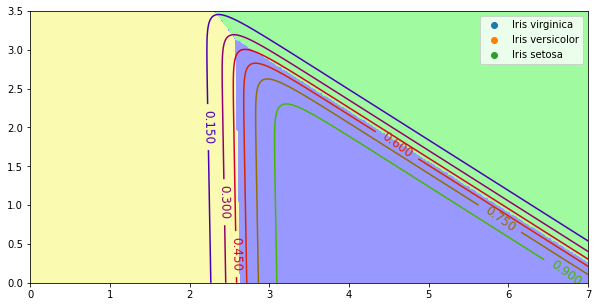

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(x[y==0, 0], x[y==0, 1], label="Iris virginica")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Iris versicolor")
plt.scatter(x[y==2, 0], x[y==2, 1], label="Iris setosa")

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_prob = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)
zz1 = y_prob[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.axis([0, 7, 0, 3.5])
plt.legend()
plt.show()